# Stable Diffusion API Test

## 載入套件

In [1]:
import urllib.request
import base64
import json
import time
import os

## 圖像編碼與解碼函數

In [3]:
def encode_file_to_base64(path):
    with open(path, 'rb') as file:
        return base64.b64encode(file.read()).decode('utf-8')

def decode_and_save_base64(base64_str, save_path):
    with open(save_path, "wb") as file:
        file.write(base64.b64decode(base64_str))

## 以文生圖(Text to image)

In [28]:
payload = {
    "prompt": "masterpiece, (best quality:1.1), 1 golden-hair girl <lora:lora_model:1>",  # extra networks also in prompts
    "negative_prompt": "",
    "seed": 1,
    "steps": 20,
    "width": 512,
    "height": 512,
    "cfg_scale": 7,
    "sampler_name": "DPM++ 2M",
    "n_iter": 1,
    "batch_size": 1,
}

webui_server_url = 'http://127.0.0.1:7860'
api_endpoint = f'{webui_server_url}/sdapi/v1/txt2img'
data = json.dumps(payload).encode('utf-8')
request = urllib.request.Request(
    api_endpoint,
    headers={'Content-Type': 'application/json'},
    data=data,
)
response = urllib.request.urlopen(request)
response = json.loads(response.read().decode('utf-8'))
image = response.get('images')[0]
decode_and_save_base64(image, './out.png')

## 顯示輸出圖檔

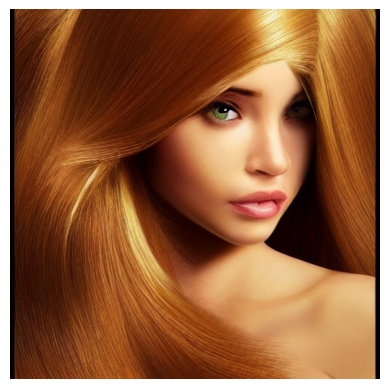

In [29]:
import matplotlib.pyplot as plt

def show_image(image_path):
    image = plt.imread(image_path)    
    fig, ax = plt.subplots()
    im = ax.imshow(image)
    ax.axis('off')
    plt.show()
    
show_image('./out.png')

## 以圖生圖(Image modification)

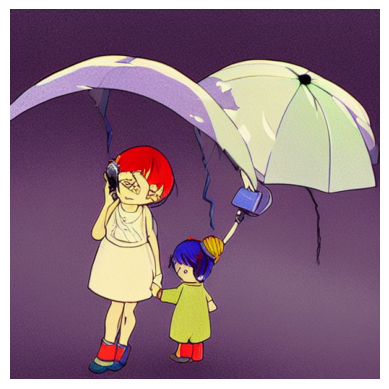

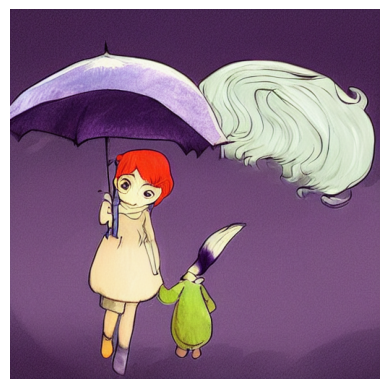

In [35]:
out_dir = 'img2img'
os.makedirs(out_dir, exist_ok=True)

batch_size = 2
init_images = [
    encode_file_to_base64("./images/in.png"),
]
payload = {
    "prompt": "blue hair",
    "seed": 1,
    "steps": 20,
    "width": 512,
    "height": 512,
    "denoising_strength": 0.5,
    "n_iter": 1,
    "init_images": init_images,
    "batch_size": batch_size if len(init_images) == 1 else len(init_images),
    # "mask": encode_file_to_base64(r"B:\path\to\mask.png")
}

webui_server_url = 'http://127.0.0.1:7860'
api_endpoint = f'{webui_server_url}/sdapi/v1/img2img'
data = json.dumps(payload).encode('utf-8')
request = urllib.request.Request(
    api_endpoint,
    headers={'Content-Type': 'application/json'},
    data=data,
)
response = urllib.request.urlopen(request)
response = json.loads(response.read().decode('utf-8'))
for index, image in enumerate(response.get('images')):
    save_path = f'{out_dir}/{index+1:02d}.png'
    decode_and_save_base64(image, save_path)
    show_image(save_path)